In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
SEASONS = ["2017-2018","2018-2019","2019-2020","2020-2021"]

In [3]:
columns = ['index', 'Team', '# Pl', 'Age', 'Poss', 'Gls', 'Ast', 'G-PK', 'PK',
       'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
       'PrgP', 'Gls_Conceded', 'Ast_Conceded', 'G-PK_Conceded', 'PK_Conceded',
       'PKatt_Conceded', 'CrdY_Conceded', 'CrdR_Conceded', 'xG_Conceded',
       'npxG_Conceded', 'xAG_Conceded', 'npxG+xAG_Conceded', 'PrgC_Conceded',
       'PrgP_Conceded', 'season']
df = pd.DataFrame(columns=columns)
for season in SEASONS:
    year_df = pd.read_csv(f"../datasets/raw/unsupervised_learning/teams/fbref.com/team_stats_{season}.csv")
    year_df['season'] = season
    year_df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
    df = pd.concat([df, year_df])

In [4]:
# remove unnecessary columns
columns = ['index', 'Team','Poss','Gls','Ast','PrgC','PrgP','Gls_Conceded','Ast_Conceded','PrgC_Conceded','PrgP_Conceded']
df=df[columns]
df

,index,Team,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,PrgP_Conceded
0,0,Arsenal,61.4,73,61,915,2223,51,38,637,1188
1,1,Bournemouth,48.1,45,36,702,1526,60,44,700,1665
2,2,Brighton,43.7,33,25,523,1230,49,36,829,1816
3,3,Burnley,43.7,35,26,431,1103,38,29,866,1572
4,4,Chelsea,55.6,60,42,1045,1998,36,26,582,1400
...,...,...,...,...,...,...,...,...,...,...,...
15,15,Southampton,52.0,47,33,626,1195,67,44,555,1407
16,16,Tottenham,51.6,66,50,633,1330,42,24,723,1514
17,17,West Brom,37.9,33,20,441,1027,73,52,931,1802
18,18,West Ham,43.2,60,46,658,1282,43,34,826,1698


In [5]:
# groupby and calculate average values of 4 seasons.
df = df.groupby('Team').mean()
df.reset_index(inplace=True)
df['index'] = df.index
df

,Team,index,Poss,Gls,Ast,PrgC,PrgP,Gls_Conceded,Ast_Conceded,PrgC_Conceded,PrgP_Conceded
0,Arsenal,0,56.700000,62.75,46.5,839.0,1874.5,46.0,31.25,670.75,1252.75
1,Aston Villa,1,46.300000,46.0,35.0,634.0,1333.5,55.5,37.0,782.0,1686.0
2,Bournemouth,2,46.366667,46.0,34.333333,680.333333,1405.666667,64.0,45.666667,728.0,1670.0
3,Brighton,3,47.350000,35.5,24.25,588.0,1392.75,51.25,36.75,758.5,1572.5
4,Burnley,4,42.225000,37.75,27.0,419.5,1009.25,51.25,39.25,881.0,1625.5
5,Cardiff City,5,35.400000,33.0,20.0,434.0,918.0,69.0,53.0,872.0,1723.0
6,Chelsea,6,59.950000,61.5,44.5,995.25,1962.0,40.25,29.5,511.0,1185.0
7,Crystal Palace,7,43.950000,40.0,27.0,655.0,1280.25,54.75,39.5,751.5,1778.75
8,Everton,8,48.100000,45.5,31.0,600.25,1339.0,50.5,36.75,716.5,1509.25
9,Fulham,9,49.250000,29.5,21.0,677.5,1420.5,65.5,46.5,687.5,1521.5


<Axes: >

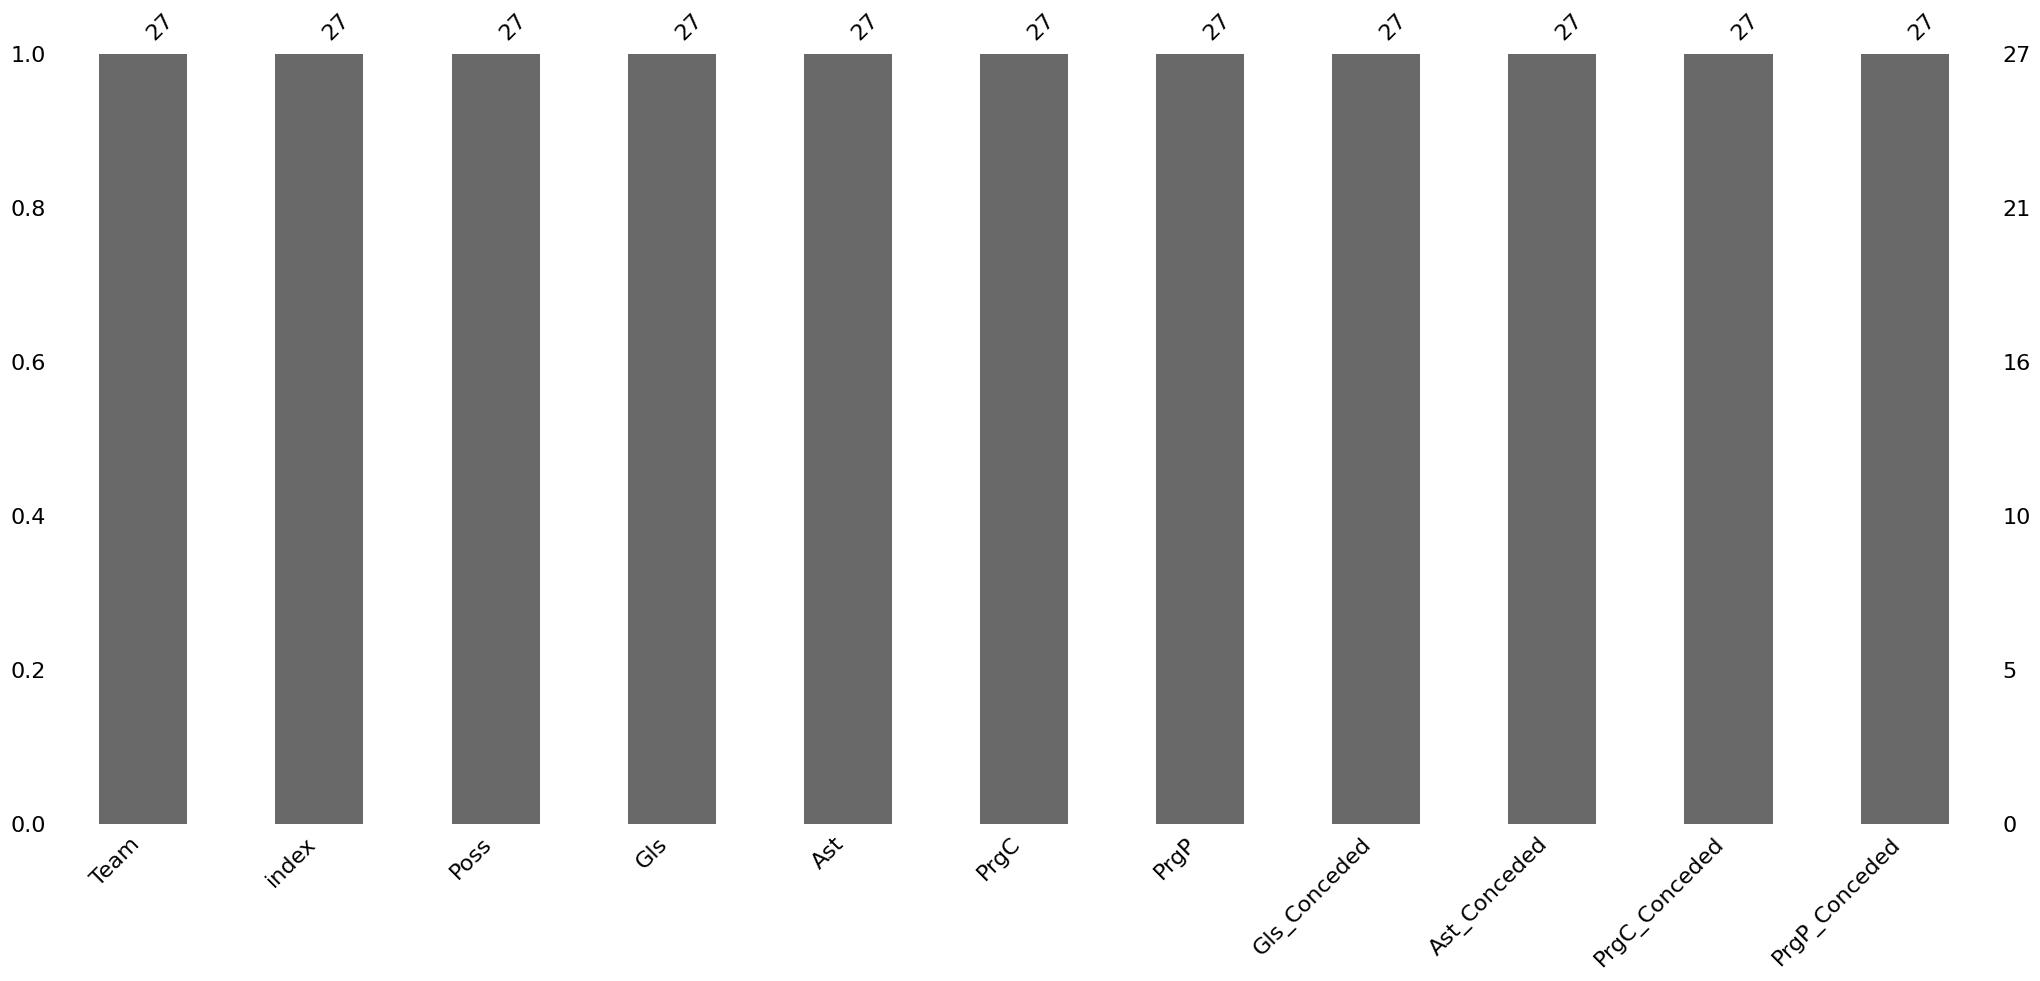

In [6]:
msno.bar(df)

In [7]:
df.to_csv('../datasets/normalized/unsupervised_learning/final_teams_dataset.csv')